In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from besos import eppy_funcs as ef, sampling
import os
plt.style.use('bmh')

from utils.idf_utils import set_runperiod, show_runperiod

In [2]:
weather_path = os.path.join(os.getcwd(), '..', 'data', 'weather')
idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')

b = ef.get_building(os.path.join(idf_path, 'smalloffice.idf'))
start = '2020-01-01'
end = '2020-01-08'

print('Before:')
show_runperiod(b)
set_runperiod(b, start=start, end=end)
print('After:')
show_runperiod(b)

Before:
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    ,                         !- Begin Year
    12,                       !- End Month
    31,                       !- End Day of Month
    ,                         !- End Year
    Sunday,                   !- Day of Week for Start Day
    No,                       !- Use Weather File Holidays and Special Days
    No,                       !- Use Weather File Daylight Saving Period
    No,                       !- Apply Weekend Holiday Rule
    Yes,                      !- Use Weather File Rain Indicators
    Yes;                      !- Use Weather File Snow Indicators
]
After:
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    2020,                     !- Begin Year
    1,                        !- End Month
    8,               

In [2]:
import besos
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
import seaborn as sns
import pandas as pd
import os
from besos import eppy_funcs as ef, sampling
from besos.evaluator import EvaluatorEP
from besos.parameters import FieldSelector, Parameter, RangeParameter
from besos.problem import EPProblem
from ipywidgets import FloatSlider, interact
from sklearn import linear_model, pipeline
from sklearn.preprocessing import StandardScaler


def besos_run(building):
    '''
    function to test how the model is running
    '''

    parameters = [
        Parameter(
            FieldSelector(
                object_name='NonRes Fixed Assembly Window',
                field_name='Solar Heat Gain Coefficient'
            ),
            value_descriptors=RangeParameter(0.01, 0.99),
        ),
        Parameter(
            FieldSelector('Lights', '*', 'Watts per Zone Floor Area'),
            value_descriptors=RangeParameter(8, 12),
            name='Light Watts/Area',
        ),
        ]

    objectives = ['Electricity:Facility']
    problem = EPProblem(parameters, objectives)

    inputs = sampling.dist_sampler(sampling.lhs, problem, 5)

    print(inputs)
    inputs.describe()

    evaluator = EvaluatorEP(problem, building)
    train = evaluator.df_apply(inputs, keep_input=True)
    train.head()

weather_path = os.path.join(os.getcwd(), '..', 'data', 'weather')
idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')

b = ef.get_building(os.path.join(idf_path, 'smalloffice.idf'))
# b = ef.get_building(os.path.join(idf_path, 'in.idf'))
# besos_run(b)

In [4]:
from besos import eppy_funcs as ep, sampling
import pandas as pd
import os
import opyplus as op

from utils.idf_utils import show_runperiod, set_runperiod

def opyplus_run(idf_path, weather_path, output_dir):
    '''
    test_run
    '''
    # epath = op.get_eplus_base_dir_path((9, 0, 1))

    s = op.simulate(idf_path, weather_path, output_dir)
    
    
    print(s.__dict__)
    print(list(s.__dict__))
    print('resulting eso: ', s.__dict__['_resource_map']['eso'])
    # eso = s.get_out_eso()

    # results = pd.read_csv(os.path.join(output_dir, 'eplus

def get_run_results(results_dir):
    '''
    After a run of opyplus.simulate obtains the

    '''
    pass


idf_dir = os.path.join(os.getcwd(), '..', 'data', 'epm')

idf_path = os.path.join(idf_dir, 'smalloffice.idf')
weather_path = os.path.join(os.getcwd(), '..', 'data',
                            'weather', 'greatfalls.epw')
    
model = ep.get_building(idf_path)
print('runperiod')
show_runperiod(model)
start = '2020-01-01'
end = '2020-01-08'
set_runperiod(model, start=start, end=end)
model.saveas(os.path.join(idf_dir, 'week_simulation.idf'))
idf_path = os.path.join(idf_dir, 'week_simulation.idf')

print('new runperiod')
show_runperiod(model)

out = os.path.join('dump')
opyplus_run(idf_path, weather_path, out)


called Simulation.from_input on a simulation directory that is not empty (dump)


runperiod
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    ,                         !- Begin Year
    12,                       !- End Month
    31,                       !- End Day of Month
    ,                         !- End Year
    Sunday,                   !- Day of Week for Start Day
    No,                       !- Use Weather File Holidays and Special Days
    No,                       !- Use Weather File Daylight Saving Period
    No,                       !- Apply Weekend Holiday Rule
    Yes,                      !- Use Weather File Rain Indicators
    Yes;                      !- Use Weather File Snow Indicators
]
new runperiod
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    2020,                     !- Begin Year
    1,                        !- End Month
    8,      

Relative to World Coordinates:   0%|          | 0/6 [00:00<?, ?it/s]

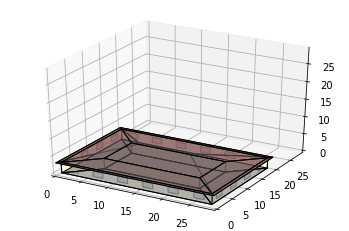

In [9]:
import matplotlib.pyplot as plt

model.view_model()

plt.show()

In [2]:
from besos import eppy_funcs as ef
import besos.sampling as sampling
from besos.problem import EPProblem
from besos.evaluator import EvaluatorEP
from besos.parameters import wwr, RangeParameter, FieldSelector, Parameter

idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')
idf_file = os.path.join(idf_path, 'smalloffice.idf')

weather_path = os.path.join(os.getcwd(), '..', 'data', 'weather', 'greatfalls.epw')

Relative to World Coordinates:   0%|          | 0/6 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1d005bbd550>)

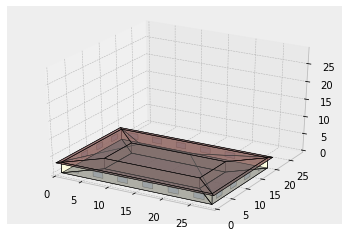

In [3]:
building = ef.get_building(idf_file)
building.view_model()

In [4]:
timeframe = FieldSelector(class_name='RUNPERIOD', object_name='', field_name='End_Month')

parameters = [Parameter(timeframe, value_descriptor=RangeParameter(1, 13), name='Simulation Period')]
parameters.append(wwr(RangeParameter(0.1, 0.9)))

objective = ['Gas:Facility', 'Electricity:Facility']
problem = EPProblem(parameters, objective)


C:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\besos\parameters.py:424: FutureWarning: Use value_descriptors instead of value_descriptor.
  warnings.warn(


In [5]:
evaluator = EvaluatorEP(problem, building, epw=weather_path, progress_bar=True, out_dir='dump')

In [6]:
import numpy as np
import pandas as pd

samples = 3
inputs = sampling.dist_sampler(sampling.lhs, problem, samples)

inputs = pd.DataFrame(columns=inputs.columns, index=range(samples))
print(inputs.columns)
inputs[inputs.columns[0]] = pd.Series(np.random.randint(2, 13, size=samples))
inputs[inputs.columns[1]] = pd.Series(np.random.uniform(0.1, 0.9, size=samples))

Index(['Simulation Period', 'RangeParameter [0.1, 0.9]'], dtype='object')


In [14]:
print(inputs)

   Simulation Period  RangeParameter [0.1, 0.9]
0                  2                   0.224716
1                 12                   0.157100
2                  9                   0.396782


In [15]:
outputs = evaluator.df_apply(inputs)

Executing: 100%|██████████| 3/3 [01:14<00:00, 24.93s/row]


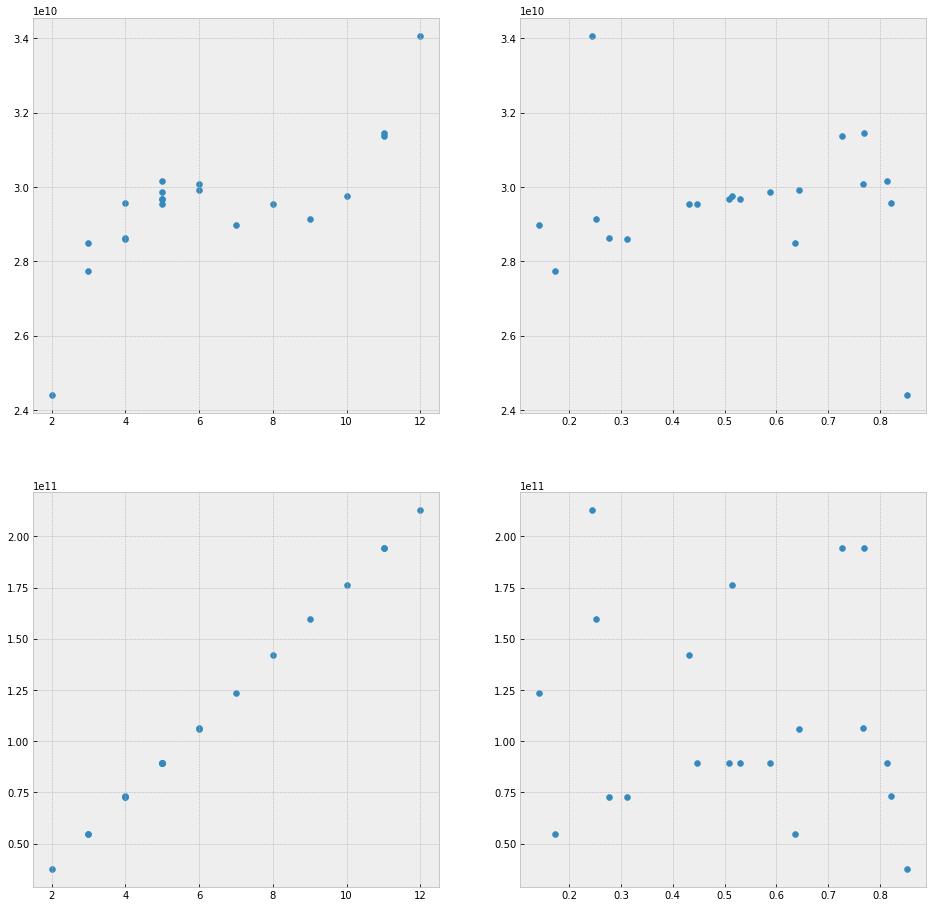

In [12]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

ax[0,0].scatter(inputs[inputs.columns[0]], outputs[outputs.columns[0]])
ax[0,1].scatter(inputs[inputs.columns[1]], outputs[outputs.columns[0]])
ax[1,0].scatter(inputs[inputs.columns[0]], outputs[outputs.columns[1]])
ax[1,1].scatter(inputs[inputs.columns[1]], outputs[outputs.columns[1]])

plt.show()

In [9]:
outputs

,Gas:Facility,Electricity:Facility
0,2.968323e+10,8.922011e+10
1,2.850135e+10,5.478828e+10
2,3.008186e+10,1.062774e+11
3,2.966997e+10,8.920811e+10
4,2.773895e+10,5.445550e+10
5,2.441006e+10,3.744015e+10
6,2.976077e+10,1.764383e+11
7,2.954896e+10,1.420428e+11
8,2.914954e+10,1.597730e+11
9,2.993192e+10,1.061411e+11


In [19]:
building.idfobjects

{'VERSION': [
 Version,
     9.0;                      !- Version Identifier
 ],
 'SIMULATIONCONTROL': [
 SimulationControl,
     Yes,                      !- Do Zone Sizing Calculation
     Yes,                      !- Do System Sizing Calculation
     Yes,                      !- Do Plant Sizing Calculation
     No,                       !- Run Simulation for Sizing Periods
     YES;                      !- Run Simulation for Weather File Run Periods
 ],
 'BUILDING': [
 Building,
     OfficeSmall,              !- Name
     0,                        !- North Axis
     City,                     !- Terrain
     0.04,                     !- Loads Convergence Tolerance Value
     0.2,                      !- Temperature Convergence Tolerance Value
     FullInteriorAndExterior,    !- Solar Distribution
     25,                       !- Maximum Number of Warmup Days
     6;                        !- Minimum Number of Warmup Days
 ],
 'SHADOWCALCULATION': [
 ShadowCalculation,
     AverageOv

Running analysis for buildings: ['apartment', 'office', 'hospital', 'school', 'hotel'].
This is the problem:
EPProblem(inputs=[Parameter(selector=FieldSelector(field_name='Begin_Day_of_Month', class_name='RUNPERIOD'), value_descriptors=[RangeParameter(min=1, max=31)]), Parameter(selector=FieldSelector(field_name='End_Day_of_Month', class_name='RUNPERIOD'), value_descriptors=[RangeParameter(min=1, max=31)]), Parameter(selector=FieldSelector(field_name='Begin_Month', class_name='RUNPERIOD'), value_descriptors=[RangeParameter(min=1, max=13)])], outputs=[MeterReader(class_name='Output:Meter', frequency='Hourly', func=<function sum_values at 0x000001D06896C5E0>, key_name='Electricity:Facility'), MeterReader(class_name='Output:Meter', frequency='Hourly', func=<function sum_values at 0x000001D06896C5E0>, key_name='Gas:Facility')], minimize_outputs=[True, True], converters={'outputs': <class 'besos.objectives.MeterReader'>, 'constraints': <class 'besos.objectives.MeterReader'>})
All buildings 

C:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\besos\parameters.py:424: FutureWarning: Use value_descriptors instead of value_descriptor.
  warnings.warn(


Relative to World Coordinates:   0%|          | 0/6 [00:00<?, ?it/s]

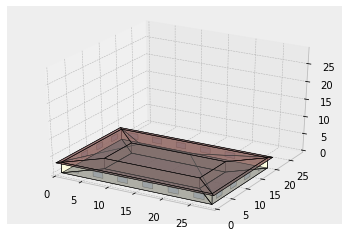



Executing:   0%|          | 0/1 [13:32<?, ?row/s]


Executing: 100%|██████████| 1/1 [00:36<00:00, 36.33s/row]


Outputs: 
   Electricity:Facility  Gas:Facility
0          1.951052e+11  1.946013e+09
all good
Starting analysis for office.


Relative to World Coordinates:   0%|          | 0/6 [00:00<?, ?it/s]

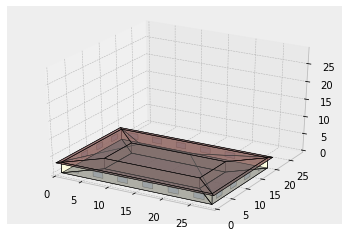

KeyboardInterrupt: 

In [9]:
import os
import pandas as pd
import numpy as np
import besos
from besos import eppy_funcs as ef
import besos.sampling as sampling
from besos.problem import EPProblem
from besos.evaluator import EvaluatorEP
from besos.objectives import MeterReader, VariableReader
from besos.parameters import wwr, RangeParameter, FieldSelector, Parameter
import matplotlib.pyplot as plt
plt.style.use('bmh')

from config import file_dict


def simulate_week(buildings, idf_path, weather_file, month=1, view_model=True):
    '''
    Aims to recreate Figure 1 in Reynolds et at.
    https://www.sciencedirect.com/science/article/pii/S0306261918317070
    using besos.

    Parameters
    ----------
    buildings : list of str
        list of considered building. Are translated to idf files as in config.py
    idf_path : str
        path to idf files
    weather_file : str
        path to a weather file that should be simulated
    month : int
        month in which the simulation should take place
    view_model : bool
        if True, plots models of each used idf file

    Returns 
    ----------
    -

    '''

    print(f'Running analysis for buildings: {buildings}.')
    results = pd.DataFrame(columns=[])
    
    start_day = FieldSelector(class_name='RUNPERIOD', object_name='', field_name='Begin_Day_of_Month')
    start_weekday = FieldSelector(class_name='RUNPERIOD', object_name='', field_name='Day_of_Week_for_Start_Day')
    end_day = FieldSelector(class_name='RUNPERIOD', object_name='', field_name='End_Day_of_Month')
    start_month = FieldSelector(class_name='RUNPERIOD', object_name='', field_name='Begin_Month')

    parameters = [
            Parameter(start_day, value_descriptor=RangeParameter(1, 31), name='start_day'),
    #        Parameter(start_weekday, name='start_weekday'),
            Parameter(end_day, value_descriptor=RangeParameter(1, 31), name='end_day'),
            Parameter(start_month, value_descriptor=RangeParameter(1, 13), name='start_month')
                ]

    # objective = ['Gas:Facility', 'Electricity:Facility']
    # objectives = [
    #                MeterReader('Gas:Facility', frequency='Hourly'), 
    #                MeterReader('Electricity:Facility', frequency='Hourly')
    #            ]

    objectives = [
                MeterReader(key_name='Electricity:Facility', 
                            class_name='Output:Meter',
                            frequency="Hourly"
                        ),
                MeterReader(key_name='Gas:Facility', 
                            class_name='Output:Meter',
                            frequency="Hourly"
                        ),
                    ]
    
    problem = EPProblem(parameters, outputs=objectives)
    print('This is the problem:')
    print(problem)

    inputs = pd.DataFrame({'start_day': [1], 
    #                        'start_weekday': ['Monday'],
                           'end_day': [8],
                           'start_month': [month],}, index=[0])

    print('All buildings are given these inputs: ')
    print(inputs.head())

    for building in buildings:

        print(f"Starting analysis for {building}.")

        # model = os.path.join(idf_path, file_dict[building])
        model = os.path.join(idf_path, 'smalloffice.idf')
        model = ef.get_building(model)

        if view_model: 
            model.view_model()
            plt.show()
        
        evaluator = EvaluatorEP(problem, model, epw=weather_file, out_dir='dump')
        outputs = evaluator.df_apply(inputs)

        print('Outputs: ')
        print(outputs.head())

        print('all good')
        


        break


        # elec_reader = MeterReader('Electricity:Facility')
        # gas_reader = MeterReader('Gas:Facility')

    print('All done here')






if __name__ == '__main__':
    weather_file = os.path.join(os.getcwd(), '..', 'data', 'weather', 'portangeles.epw') 
    idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')
    buildings = ['apartment', 'office', 'hospital', 'school', 'hotel']

    simulate_week(buildings, idf_path, weather_file, view_model=True)


In [1]:
from besos.eplus_funcs import print_available_outputs
import os
import pandas as pd
import numpy as np
import besos
from besos import eppy_funcs as ef
import besos.sampling as sampling
from besos.problem import EPProblem
from besos.evaluator import EvaluatorEP
from besos.objectives import MeterReader, VariableReader
from besos.parameters import wwr, RangeParameter, FieldSelector, Parameter
import matplotlib.pyplot as plt
plt.style.use('bmh')


idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')
b = ef.get_building(os.path.join(idf_path, 'smalloffice.idf'))
print_available_outputs(b, frequency='Hourly')
print(b)
b.run(output_directory='dump')



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\s2216495\\.besos_3ofl0hc0\\eplusout.eso'

Separation found: 11
('End of Data Dictionary\n', '', '')
('1065', ',', '1,Gas:Facility [J] !Hourly\n')
('871', ',', '1,ElectricityNet:Facility [J] !Hourly\n')
('9', ',', '1,Electricity:Facility [J] !Hourly\n')
('6', ',', '1,Calendar Year of Simulation[] ! When Annual Meters Requested\n')
first remaining line
2,1, 1, 1, 0, 1, 0.00,60.00,Holiday

cols:  ['Electricity:Facility [J] !Hourly', 'ElectricityNet:Facility [J] !Hourly', 'Gas:Facility [J] !Hourly']
obtained:
            timestamp  Electricity:Facility [J] !Hourly  \
0 2020-01-01 00:00:00                      1.737468e+07   
1 2020-01-01 01:00:00                      1.609990e+07   
2 2020-01-01 02:00:00                      1.617140e+07   
3 2020-01-01 03:00:00                      1.588108e+07   
4 2020-01-01 04:00:00                      1.591951e+07   

   ElectricityNet:Facility [J] !Hourly  Gas:Facility [J] !Hourly  
0                         1.737468e+07                       0.0  
1                         1.609990e+07    

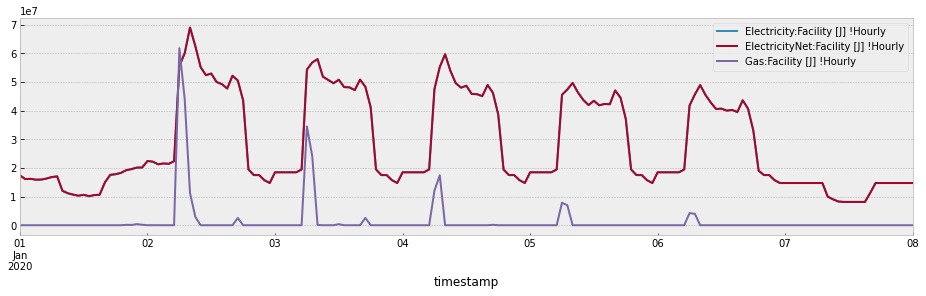

In [39]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
from datetime import datetime
import os

def mtr2df(filename):
    '''
    Reads the .mtr output file (usually 'eplusout.mtr')
    of a besos simulation

    Parameters
    ----------
    filename : str
        mtr file to be read

    
    Returns
    ----------
    data : pd.DataFrame
        dataframe of time series stored in file

    '''

    file = open(filename, 'r')
    lines = file.readlines()

    df = pd.DataFrame()

    date_indicator = '2.'
    indicators = {}
    columns = []

    # determine end of preamble
    for i, line in enumerate(lines):
        
        if line.startswith('End of Data'):
            separation = i+1
            print(f'Separation found: {separation}')
            break

    preamble = lines[:separation]
    for line in preamble[::-1]:
        line = line.partition(',')
        print(line)
        indicator = line[0]
        try:
            indicator = int(indicator)
            if indicator == 6:
                break

            col = line[-1]
            if ',' in col:
                col = col.partition(',')[-1]

            if col.endswith('\n'):
                col = col[:-1]
            columns.append(col)

        except ValueError:
            continue

    
    lines = lines[separation+1:]
    print('first remaining line')
    print(lines[0])
    columns = columns[::-1]
    len_data = len(lines) // (len(columns) + 1)
    num_cols = len(columns) + 1

    print('cols: ', columns)
    df = pd.DataFrame(columns=['timestamp']+columns)

    for i in range(len_data):
        date = lines[i * num_cols].split(',')
        month = int(date[2])
        day = int(date[3])
        hour = int(date[5]) - 1
        date = pd.Timestamp(datetime(2020, month, day, hour, 0, 0))

        row = {'timestamp': date} 
        for j, col in enumerate(columns):
            line = lines[i * num_cols + j + 1].split(',')[-1]
            row[col] = float(line)

        df = df.append(row, ignore_index=True)


        if i == 24 * 7:
            break

    print('obtained:')
    print(df.head())
    print(len(df))

    df = df.set_index('timestamp')
    
    _, ax = plt.subplots(1, 1, figsize=(16, 4))
    df.plot(ax=ax)
    plt.show()


if __name__ == '__main__':
    filename = os.path.join(os.getcwd(), 'dump', 'eplusout.mtr')
    mtr2df(filename)




